# EDA & PREPROCESSING

importing libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stat

In [76]:
df = pd.read_csv('D:\Assignment3\\clustering.csv') 

Getting General Info about Data

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(381, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 381, dtype: bool

# Data preprocessing

Dealing with missing values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

 filling up the categorical missing values

In [26]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

To choose the way to fill up  Dependents i count the column for better understanding 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

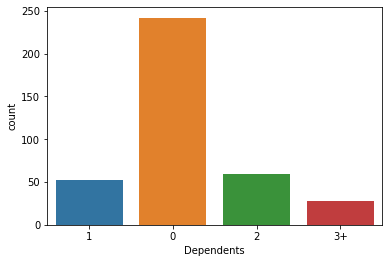

In [27]:
sns.countplot(x ='Dependents', data = df)

as shown mode is the best way fo fill up the null value 

In [28]:
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])

then filling numerical values but befor that I will check for outliers 

In [29]:
df['Credit_History'].unique()

array([1., 0.])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

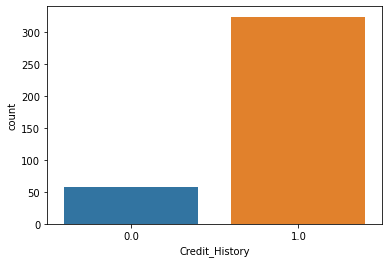

In [30]:
sns.countplot(x ='Credit_History', data = df)

In [31]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

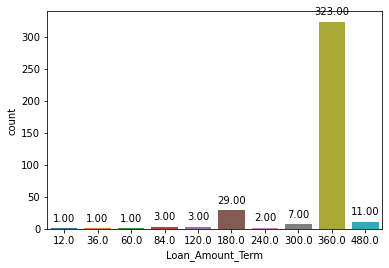

In [32]:
splot = sns.countplot(x ='Loan_Amount_Term', data = df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [33]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# check for outliers

<AxesSubplot:xlabel='LoanAmount'>

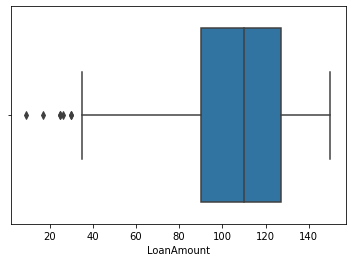

In [34]:
sns.boxplot(x="LoanAmount", data=df)

In [35]:
#there is outlier so 
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

In [36]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 34.5
up_limit is 182.5


In [37]:
outlier = []
for x in df['LoanAmount']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [17.0, 25.0, 25.0, 30.0, 30.0, 26.0, 9.0]


In [38]:
len(outlier)

7

In [39]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Check for data imbalance

The percentage of Y class : 0.71
The percentage of N class : 0.29


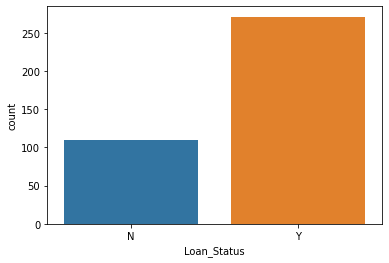

In [41]:
sns.countplot(df['Loan_Status'])
print('The percentage of Y class : %.2f' % (df['Loan_Status'].value_counts()[0] / len(df)))
print('The percentage of N class : %.2f' % (df['Loan_Status'].value_counts()[1] / len(df)))

# almost balance

# EDA

In [42]:
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].replace('Y',1,inplace=True)

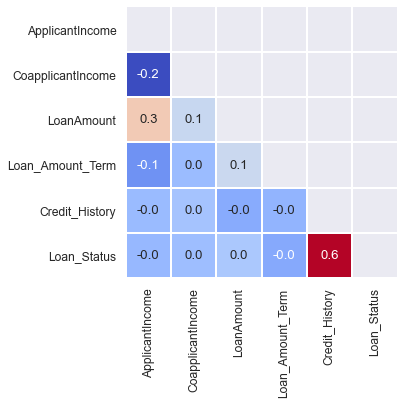

In [44]:
sns.set(font_scale=1.1)
correlation = df.corr()
mask = np.triu(correlation.corr())
plt.figure(figsize=(10, 5))
sns.heatmap(correlation,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

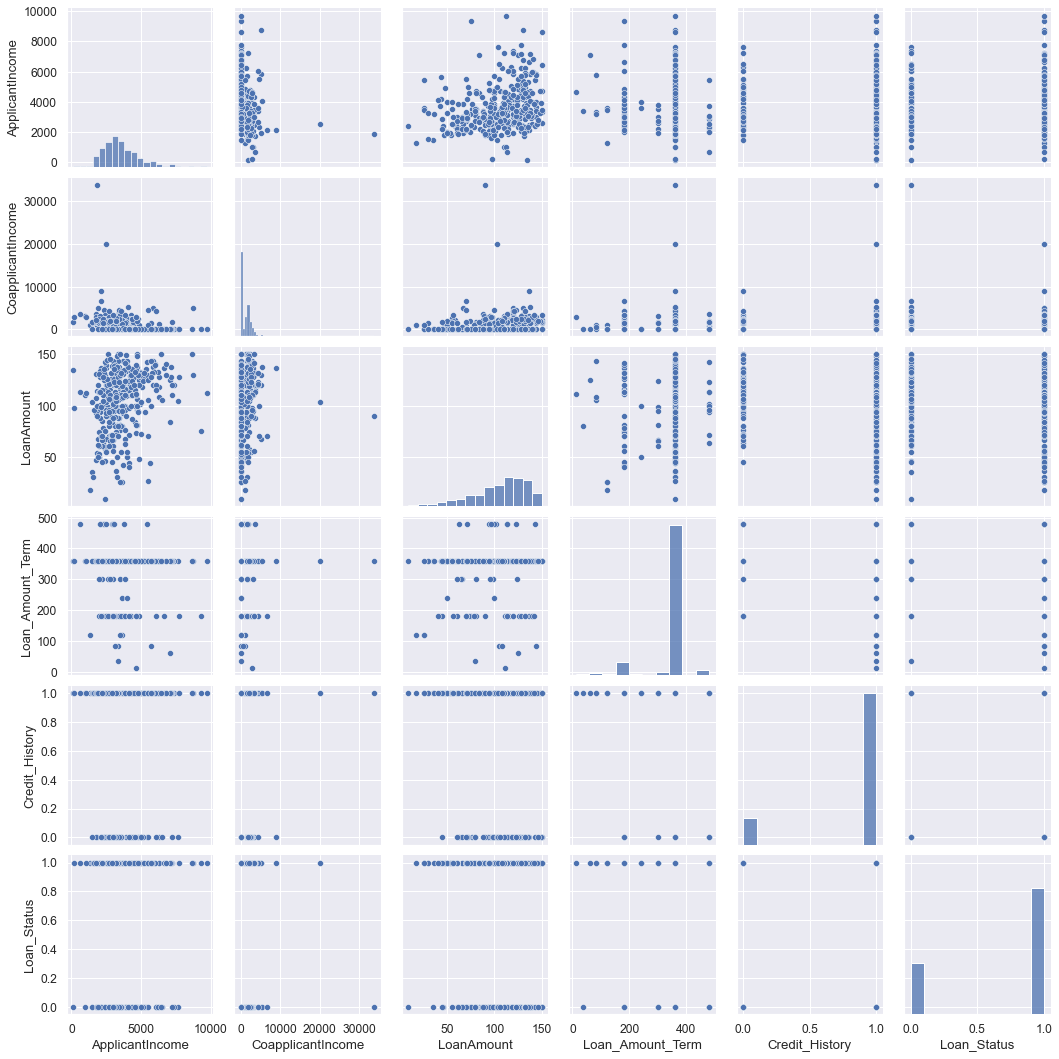

In [45]:
# check the patterns between any two features
sns.pairplot(df)

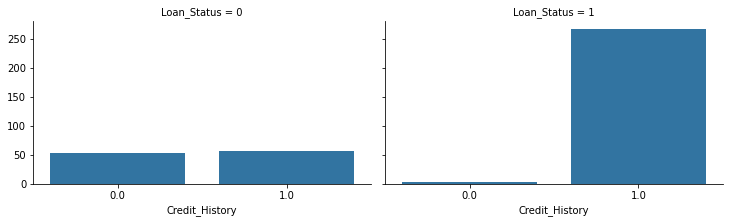

In [43]:

grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')



<AxesSubplot:xlabel='Married', ylabel='count'>

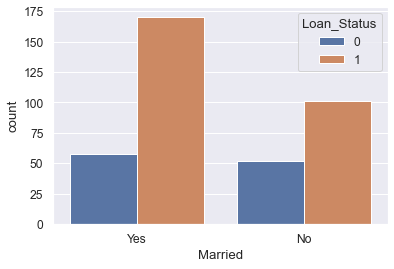

In [47]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

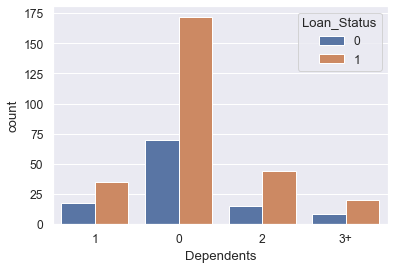

In [48]:
sns.countplot(x="Dependents", hue="Loan_Status", data=df)

# Label Encoding for categorical

In [49]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

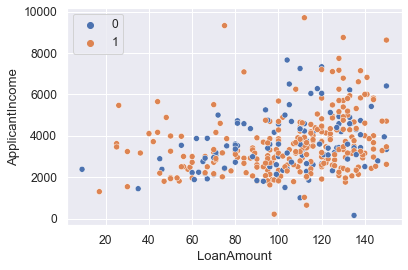

In [52]:
sns.scatterplot(df["LoanAmount"], df["ApplicantIncome"], hue=le.fit_transform(df["Loan_Status"]))

 featrues selection 

In [54]:
cols = ['Gender', 'CoapplicantIncome', "Married","Education","Loan_Status","Self_Employed","Credit_History","Property_Area", "Loan_Amount_Term", 'Loan_ID', 'CoapplicantIncome', 'Dependents']
df = df.drop(columns=cols, axis=1)
df.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


In [59]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as  sns 

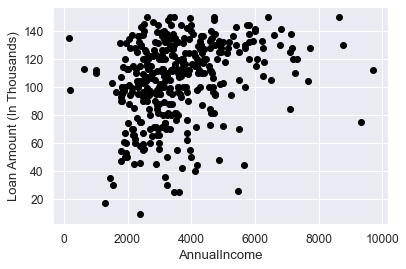

In [98]:
X = df[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [40]:
#To defined the optimal number of k clusters i used elbow method  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [41]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\anwaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


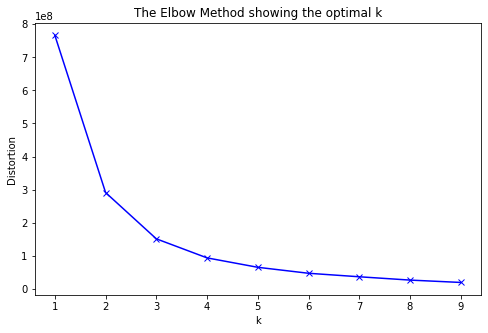

In [16]:
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

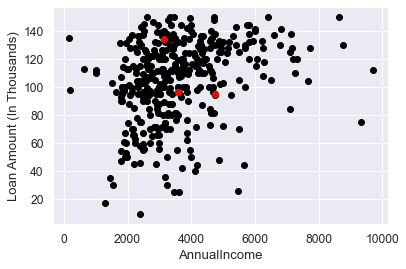

In [102]:


#number of clusters
K=3
np.random.seed(5)

#  random  centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [103]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [104]:
#it will Assign all the points to the closest group or cluster centroid then Recompute centroids again of newly formed clusters 
#and it Repeat the prrevios steps

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

133.92222877391265
271.14215781945404
192.20051157892868
219.49009789825928
198.9136595178422
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


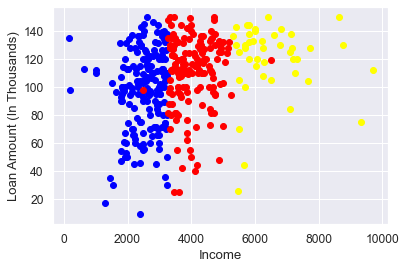

In [105]:
color=['blue','red','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [106]:
silhouette_score(X,X['Cluster'])

0.5409217193336238

# GMM

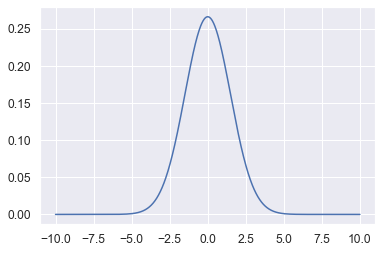

In [71]:
#this is the normal ditrepution ,try to fit the data in to it 
from scipy import stats
x = np.linspace(start=-10, stop=10, num=1000)

y = stats.norm.pdf(x, loc=0, scale=1.5) 

plt.plot(x, y)

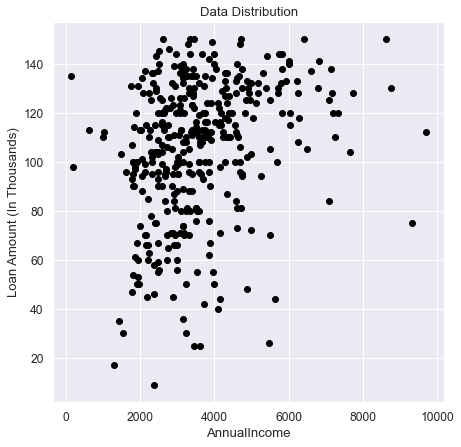

In [79]:
import pandas as pd
data = pd.read_csv('D:\Assignment3\\clustering.csv')

plt.figure(figsize=(7,7))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Data Distribution')
plt.show()

In [80]:
import os
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [81]:
X = StandardScaler().fit_transform(X)
X = torch.from_numpy(X).float()


In [88]:
class KMeansClustering():


    
    
    
    def __init__(self, n_clusters=3):
      
        self.n_clusters = n_clusters
        self.centroids = None
        
    
    def fit_transform(self, X, n_iter=20):
    
        
    
        size = X.shape[0]
        #  in this range it will Find min and max values to generate a random centroid
        xmax = X.max(dim=0)[0].unsqueeze(1)
        xmin = X.min(dim=0)[0].unsqueeze(1)
        
        dists = torch.zeros((size, self.n_clusters))
        best_loss = 1e10
        pred = None
        
        for _ in range(n_iter):
            centroids = (xmin - xmax) * torch.rand((X.shape[1], self.n_clusters)) + xmax
            old_loss = -1
            while 1:
                for i in range(self.n_clusters):  # in E-step:  each point will be assigned to a cluster
                    ctr = centroids[:, i].unsqueeze(1)
                    dists[:, i] = (X - ctr.T).pow(2).sum(dim=1).sqrt()
                dists_min, labels = dists.min(dim=1)
                
                for i in range(self.n_clusters):  # in M-step: the centroids will be re-compute 
                    idx = torch.where(labels == i)[0]
                    if len(idx) == 0:
                        continue
                    centroids[:, i] = X[idx].mean(dim=0)
                    
                new_loss = dists_min.sum()  # compute Loss: by add of the distance between all points and the centroid
                if old_loss == new_loss:
                    break
                old_loss = new_loss
            if new_loss < best_loss:
                best_loss = new_loss
                pred = labels
        return pred

In [97]:
kms = KMeansClustering(n_clusters=3)
pred = kms.fit_transform(X,n_iter=20)

#plt.scatter(X[:, 0], X[:, 1], c=pred)

In [92]:
from sklearn import metrics
metrics.rand_score(X[:,1], pred)

0.6274485426163835

In [87]:
#X

In [68]:
#X = torch.from_numpy(X).float()


In [44]:
class GaussianMixture():
   
    def __init__(self, n_components, n_iter):
     
        self.n_components = n_components
        self.n_iter = n_iter
        
    def gaussian_likelihood(self, X, n):
        
        two_pi = torch.tensor(2 * math.pi, dtype=torch.float64)
        fact = 1 / torch.sqrt(torch.pow(two_pi, X.shape[0]) * torch.det(self.sigma[n]))
        
        X_minus_mu = X - self.mu[n].T
        sigma_inv = torch.inverse(self.sigma[n])
        return fact * torch.exp(-0.5 * X_minus_mu.mm(sigma_inv).mm(X_minus_mu.T))
        
    def e_step(self, X):
       
        for j in range(self.n_components):
            for i in range(self.n_samples):
                self.likelihoods[i, j] = self.gaussian_likelihood(X[i], j)
                
     
        
        prob_num = self.priors.T * self.likelihoods
        prob_den = prob_num.sum(dim=1).unsqueeze(1)
        self.probs = prob_num / prob_den
        
    def m_step(self, X):
       
        for j in range(self.n_components):
            probs_j = self.probs[:, j]  # here contain All probabilities from the j'th which is the guassian
            probs_j_sum = probs_j.sum()
            self.priors[j] = probs_j.sum() / self.n_samples
            
            probs_j_uns = probs_j.unsqueeze(1)
            
            # based on the probabilities of data it will Recomputes the means of every  gaussian 
            
            self.mu[j] = (probs_j_uns * X).sum(dim=0).unsqueeze(1)
            self.mu[j] /= probs_j_sum
            
            # this will Recomputes the covariance 
            X_minus_mu = X - self.mu[j].T
            self.sigma[j].fill_(0.)
            for i in range(self.n_samples):
                row = X_minus_mu[i, :].unsqueeze(1)
                self.sigma[j] += probs_j[i] * row.mm(row.T)
            self.sigma[j] /= probs_j_sum
            
    def fit_predict(self, X):
        
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        self.sigma = torch.zeros((self.n_components, self.n_features, self.n_features), dtype=torch.float64)
        self.mu = torch.zeros((self.n_components, self.n_features, 1), dtype=torch.float64)
        self.priors = torch.zeros((self.n_components, 1), dtype=torch.float64).fill_(1 / self.n_components)

        kms = KMeansClustering(n_clusters=self.n_components)
        pred = kms.fit_transform(X).unsqueeze(1)
        self.probs = torch.zeros(self.n_samples, self.n_components)
        self.probs.scatter_(1, pred, 1)
        
   
        X_m = X - X.mean()
        X_cov = X_m.T.mm(X_m)
        for j in range(self.n_components):
            self.sigma[j] = X_cov.clone()
    
            self.mu[j] = X[torch.randint(0, self.n_samples, (1,))].T
        
        self.likelihoods = torch.zeros((self.n_samples, self.n_components), dtype=torch.float64)
        
        self.m_step(X)  
        for _ in range(self.n_iter):
            self.e_step(X)
            self.m_step(X)
            
        return self.probs.argmax(dim=1)

In [52]:
gmm = GaussianMixture(n_components=3, n_iter=20)
pred_gmm = gmm.fit_predict(X)

Text(0.5, 1.0, 'GMM clusters')

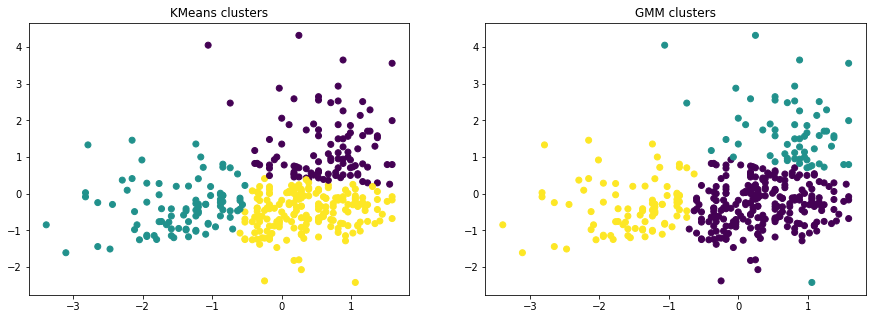

In [53]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(X[:, 0], X[:, 1], c=pred )
ax2.scatter(X[:, 0], X[:, 1], c=pred_gmm )
ax1.set_title('KMeans clusters')
ax2.set_title('GMM clusters')
#plt.scatter(X[:, 0], X[:, 1], c=pred)

In [96]:
metrics.rand_score(X[:,0], pred_gmm)

0.5532670258322973

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
df = pd.read_csv('D:\Assignment3\\clustering.csv') 
X = df[["LoanAmount","ApplicantIncome"]]

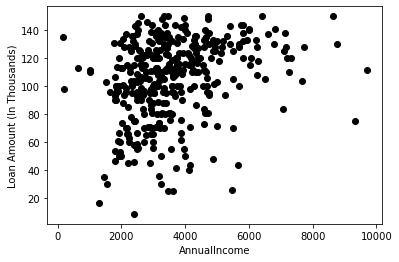

For n_clusters = 2 The average silhouette_score is : 0.5957289038117295


TypeError: '(slice(None, None, None), 0)' is an invalid key

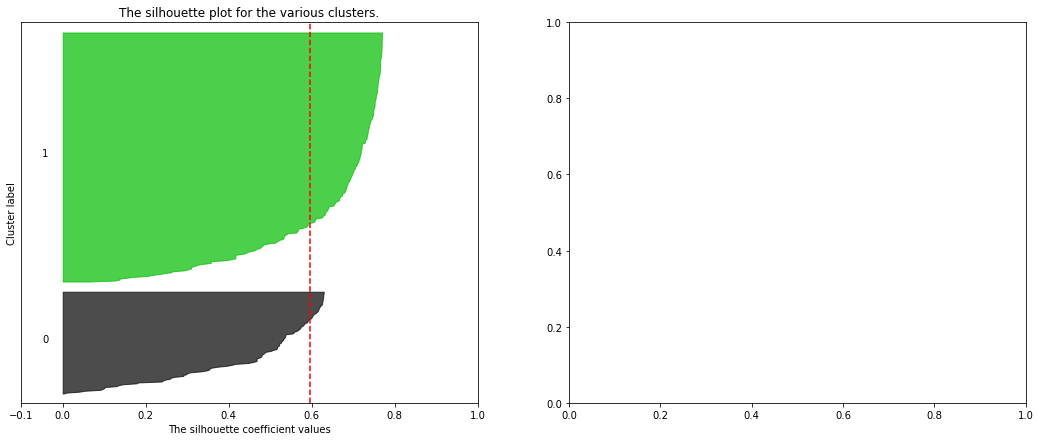

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = df[["LoanAmount","ApplicantIncome"]]

plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))


        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

   
    centers = clusterer.cluster_centers_
 
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

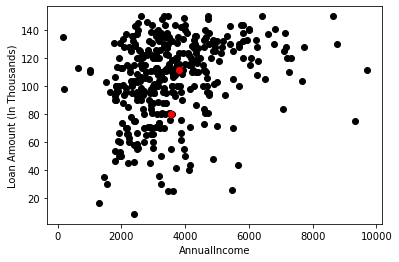

In [6]:

#number of clusters
K=2
np.random.seed(0)

#  random  centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [7]:


diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-7-ed5bb16b2605>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-7-ed5bb16b2605>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


229.31045043617587
192.12688801901947
78.3416482061933
15.695981556435925
0.0


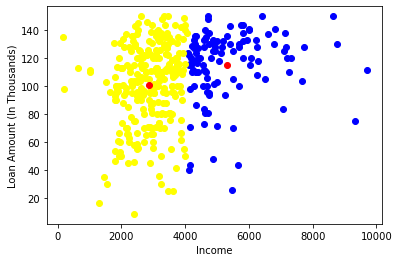

In [9]:
color=['blue','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()